# Declaration of Originality

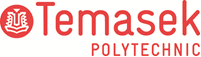

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : ZULZAWAID BIN ZUIKIFLI (2401713I)
* Tutorial Group                : T04
* Tutor						    : Mr Emile Sebastian
* Submission Date               : 10/02/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

Checklist

Dataset
Missing data
Distribution of target
Outliers
Pre-processing steps
Plots
Base model
Metric selected
Metric Score
Other models
Model refinement
Hyperparameters Tuning
Streamlit

In [1]:
import sys
print(sys.executable)

c:\Users\zawai\anaconda3\envs\mldp\python.exe


# Libraries

In [2]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# 1. Business Understanding


### Goal: 

Predict whether a telecom customer will churn based on customer demographics, service subscriptions, contract type, tenure, and billing variables. This model will be helpful in identifying at-risk customers and in explaining key contributing factors to support targeted retention strategies.

This problem is a Classification problem.

# 2. Data Understanding

## 2.1 Load dataset

In [3]:
## Read *.csv file into pandas DataFrame
FILE_PATH = 'TelcoCustomerChurn.csv'
df = pd.read_csv(FILE_PATH)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 2.2 Summary Statistics

In [4]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Here, I observe that "TotalCharges" is stored as an "object" data type even thought it represents a numeric amount. This usually happens when the dataset contains a small number of non-numeric entries (such as blank strings), causing pandas to treat the entire column as text. To ensure the model can interpret this feature correctly, I will convert "TotalCharges" to a numberic type. 

In [5]:
## Check for missing data
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Even though the isna() method check returned zero, I will be scanning for blanks or spaces that the standard null-check doesn't catch. These 'hidden' blanks are often ignored by the .isna() method but still count as invalid data.

In [62]:
obj_cols = df.select_dtypes(include="object").columns

blank_counts_obj = df[obj_cols].apply(lambda col: col.astype(str).str.strip().eq("").sum())
blank_counts_obj[blank_counts_obj > 0].sort_values(ascending=False)

TotalCharges    11
dtype: int64

I am limiting this check to "object" columns because whitespace and empty strings (blanks) are strictly text-based issues. Truly numeric columns don't hide blanks as Pandas either store them as NaN (which the isna() method would already have detected in the previous checks) or force the entire column to become an 'object' type. Therefore, "hidden" blanks almost exclusively reside in columns typed as objects, and by checking object columns, I'm catching the hidden strings that isna() might have missed. Next, I will be checking the actual rows that have blank TotalCharges

In [64]:
## Checking the actual rows with blank values in 'TotalCharges' column

df.loc[df["TotalCharges"].astype(str).str.strip() == "", ["tenure", "MonthlyCharges", "TotalCharges"]].head(15)

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,
753,0,20.25,
936,0,80.85,
1082,0,25.75,
1340,0,56.05,
3331,0,19.85,
3826,0,25.35,
4380,0,20.00,
5218,0,19.70,
6670,0,73.35,


Based on the table above, the data reveals that empty TotalCharges entries occur exclusively for customers with a tenure of "0". This suggests these are new accounts that haven't reached a billing cycle. To maintain data consistency, I will impute a value of 0 for these entries, accurately reflecting their current lack of accumulated charges.

In [70]:

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [72]:
df.loc[df["tenure"] == 0, "TotalCharges"] = 0

In [73]:
print(df["TotalCharges"].dtype)

float64


In [74]:
print("Missing TotalCharges after conversion:", df["TotalCharges"].isna().sum())

Missing TotalCharges after conversion: 0


## Additional Insights and Notes

1. They are numerous non-numeric columns (Including the target variable [churn]). One-Hot Encoding will be needed.
2. "customerID" is an identifier, and not a feature. Hence, it will not help in prediction and generalization. As such, I will drop the column.
3. Although SeniorCitizen is int 64, it is actually categorical (binary)
4. Allthough there are no missing values indicated, I need to be careful of "TotalCharges" as there could be non-clean numeric. Likewise for "MonthlyCharges"?

In [6]:
## Describe data distribution
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

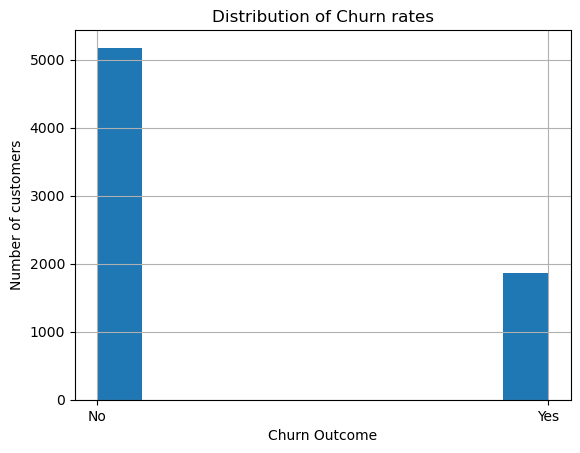

In [7]:
## Understanding distribution of target 
col_y = 'Churn'

df[col_y].hist()
plt.title(f'Distribution of Churn rates')
plt.suptitle('')
plt.xlabel('Churn Outcome')
plt.ylabel('Number of customers')
plt.show()



## for classification problems, can use histogram to understand class imbalance?

### 2.3.1.2 Understanding distribution of features

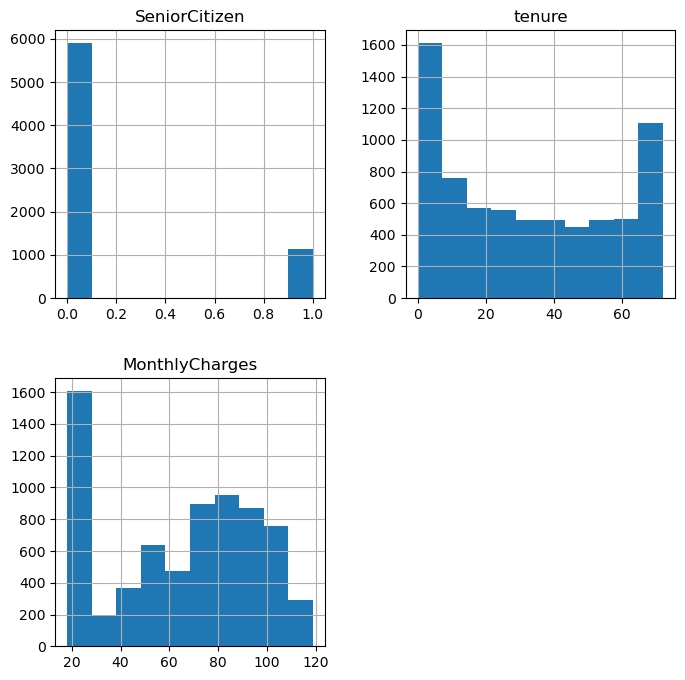

In [8]:
df.hist(figsize=(8, 8))
plt.show()

## should i drop target column?

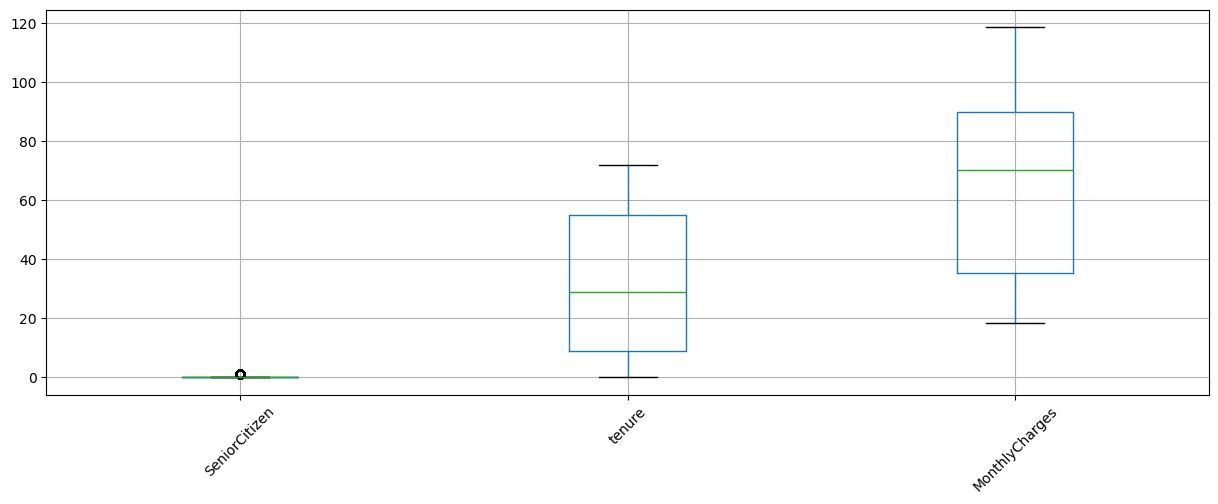

In [9]:
## Understanding distribution of features.
## Boxplot for understanding distributioin of features?
df.boxplot(rot=45, figsize=(15, 5))
plt.show()

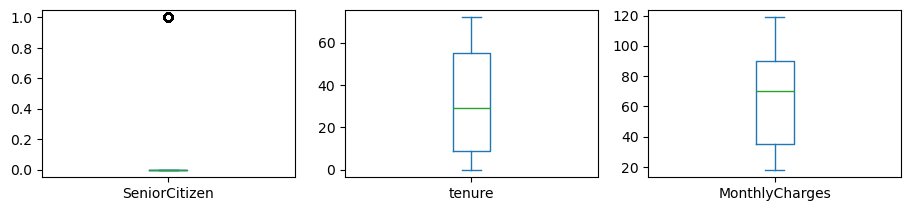

In [10]:
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))
plt.show()

### 2.3.2 Understanding relationship between variables

Correlation matrix?

In [11]:
## Understanding relationship between variables
col_numeric = df.select_dtypes(include=['float', 'int']).columns

df_corr = df[col_numeric].corr()
df_corr

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


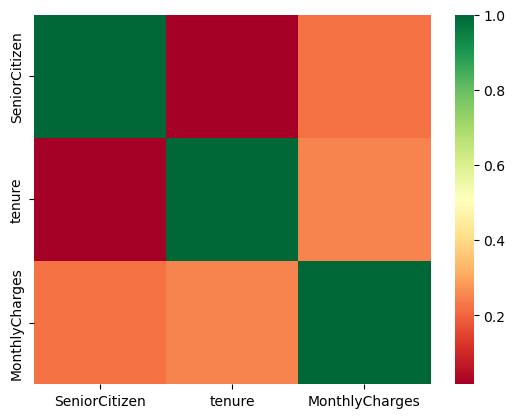

In [12]:
## Heatmap of correlation matrix

sns.heatmap(df_corr,cmap='RdYlGn')
plt.show()

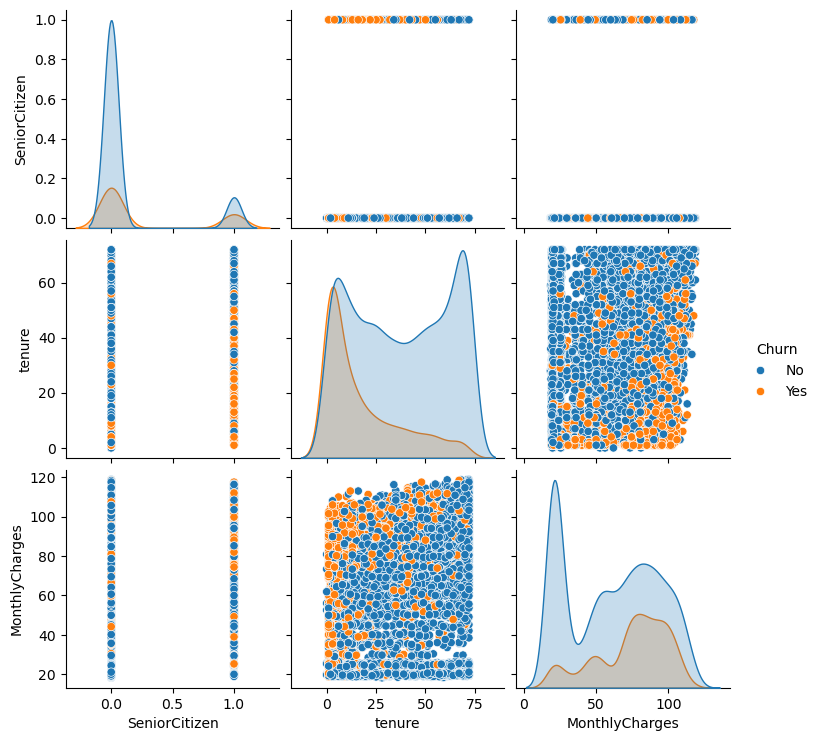

In [13]:
## pairplot to understand relationship between features

sns.pairplot(df, hue=col_y)
plt.show()

# 3. Data Preparation

## 3.1 Data Cleaning

Talk about mapping here. and why we are doing it here.

In [14]:
## Dropping target column and identifier column
## I am dropping the identifier column 'customerID' as it is not relevant for prediction
col_irrelevant = [col_y, 'customerID']

## Splitting data into features (X) and target (y)
y = df[col_y].map({"Yes": 1, "No": 0})
X = df.drop(col_irrelevant, axis=1) ## X is now features only

## Performing one-hot encoding on categorical variables
X = pd.get_dummies(X, drop_first=True)
X



,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,2,53.85,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,45,42.30,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2,70.70,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,True,True,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7039,0,72,103.20,False,True,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
7040,0,11,29.60,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,1,4,74.40,True,True,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False


correlation matrix

In [15]:
## Checking whether all features are ML models friendly after One-Hot Encoding 

X.dtypes

SeniorCitizen            int64
tenure                   int64
MonthlyCharges         float64
gender_Male               bool
Partner_Yes               bool
                        ...   
TotalCharges_997.75       bool
TotalCharges_998.1        bool
TotalCharges_999.45       bool
TotalCharges_999.8        bool
TotalCharges_999.9        bool
Length: 6559, dtype: object

Here, we can see that the categorical columns are of boolean data type

## 3.2 Train-Test Split

In [16]:
## Splitting data into train set and test set

from sklearn.model_selection import train_test_split
test_size = 0.3 ## 30% for test set and 70% for train set
random_state = 2025 ## for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=test_size, 
                                                    random_state=random_state)

# Different Models Employed

In this section, I will be develop and compare multiple machine learning models using an iterative modelling approach. Logistic Regression will be used as the overall baseline benchmark (to be refined). For each subsequent model, I will first train it using the default parameters, evaluate it, and then perform tuning to address any weakness observed.

The models employed are

1) Logistic Regression
2) Linear Discriminant Analysis
2) DecisionTreeClassifier
3) RandomForestClassifier
4) GradientBoosting

### Structure for each model

For consistency, each model will follow the same workflow:

1. Model rationale: Why this model is used at this stage and what is expected to improve or demonstrate
2. Baseline training and evaluation: Train the default model and report results using the selected metrics and confusion matrix
3. Key issue(s) observed: Identify performance gaps
4. Tuning / changes applied: I will then describe what was adjusted and why (hyperparameters / class_weight, etc.)
5. Post-tuning evaluation: Re-evaluate the tuned model and compare results against the baseline version (using the default hyperparameters)
6. Takeaway and comparison: I will summarize whether the tuned model improved performance and whether it outperformed the previous models

To note: Logistic Regression model as the baseline means it's the first, simplest model that will be used as the main reference point. 


# 4. Modelling 

Model 1: Logistic Regression Model

In this iteration, I will build a Logistic Regression model because churn is a yes/no outcome, and this model gives a strong starting point that is easy to explain and also produces churn probability scores that I can use to decide a cut-off (e.g., which customers to flag as likely to churn).

### 4.2 Train Model

In [17]:
## Initialise and train model (Logistic Regression)

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(max_iter=200)
logr.fit(X_train, y_train)

c:\Users\zawai\anaconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


# 5. Model Evaluation

In [18]:
## Evaluate model

## Model Evaluation for Logistic Regression

from sklearn.metrics import accuracy_score
y_pred_logr = logr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logr))

Logistic Regression Accuracy: 0.804070042593469


In [19]:
## to see the original columns to be provided in X_unseen_raw


raw_cols = df.drop([col_y, 'customerID'], axis=1).columns
print(list(raw_cols))

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [20]:
## Sending in our own custom values for prediction
## Building unseen data using original column names before One-Hot Encoding

import pandas as pd

X_unseen_raw = pd.DataFrame([
    {
        'gender': 'Female',
        'SeniorCitizen': 0,
        'Partner': 'Yes',
        'Dependents': 'No',
        'tenure': 1,
        'PhoneService': 'No',
        'MultipleLines': 'No phone service',
        'InternetService': 'DSL',
        'OnlineSecurity': 'Yes',
        'OnlineBackup': 'No',
        'DeviceProtection': 'No',
        'TechSupport': 'No',
        'StreamingTV': 'No',
        'StreamingMovies': 'No',
        'Contract': 'Month-to-month',
        'PaperlessBilling': 'Yes',
        'PaymentMethod': 'Electronic check',
        'MonthlyCharges': 29.85,
        'TotalCharges': 29.85
    },
    {
        'gender': 'Male',
        'SeniorCitizen': 1,
        'Partner': 'No',
        'Dependents': 'No',
        'tenure': 34,
        'PhoneService': 'Yes',
        'MultipleLines': 'No',
        'InternetService': 'Fiber optic',
        'OnlineSecurity': 'No',
        'OnlineBackup': 'Yes',
        'DeviceProtection': 'No',
        'TechSupport': 'No',
        'StreamingTV': 'No',
        'StreamingMovies': 'No',
        'Contract': 'One year',
        'PaperlessBilling': 'No',
        'PaymentMethod': 'Mailed check',
        'MonthlyCharges': 56.95,
        'TotalCharges': 1889.5
    }
])



In [21]:
## Applying OHE on unseen data
X_unseen = pd.get_dummies(X_unseen_raw, drop_first=True)

## Aligning unseen data features with training data features
X_unseen = X_unseen.reindex(columns=X_train.columns, fill_value=0)

In [22]:
pred = logr.predict(X_unseen)
print(pred)

[0 0]


Churn probability score?

Tuning, why am i tuning these parameters? what could be expected if i tune these parameters (what do i want to prove?)

## Iterative model development


In [23]:
## Initialise and train model (Logistic Regression)

In [24]:
## Further feature engineering / feature selection

Model 2: Linear Discriminant Analysis

In this iteration, I will build an LDA model because it is another simple classification model that can sometimes separate churn vs non-churn well, and it gives a useful comparison to Logistic Regression to see whether a different approach improves results.

In [25]:
## Linear Discriminant Analysis (LDA) for dimensionality reduction

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



lda = LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto")
lda.fit(X_train, y_train)

,solver,'lsqr'
,shrinkage,'auto'
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = lda.predict(X_test)
print("LDA Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

LDA Accuracy: 0.6923805016564126
Confusion Matrix:
 [[1026  555]
 [  95  437]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.65      0.76      1581
           1       0.44      0.82      0.57       532

    accuracy                           0.69      2113
   macro avg       0.68      0.74      0.67      2113
weighted avg       0.80      0.69      0.71      2113



Insights:

1. This LDA model prioritizes identifying churners (high recall for "Yes" = 0.82), meaning it is useful if the goal is to catch potential churners as possible for retention campaigns.
2. However, the model generates many false alarms (precision for "Yes" = 0.44), meaning the business may spend effort / resources containing customers who would not churn, so the usage of resources may not be optimal/efficient.

Compare with Logistic Regression; metrics
tune the decision threshold

Close of with the model choice based on:

1. business goal
2. Trade-offs

Prepare a table to compare all tuned models and justify choice

Model 3: Decision Tree Classifier

In this iteration, I will be building a Decision Tree Classifier. This model adds value beyond Logistic Regression because it can naturally capture non-linear relationships and feature interactions, which are common in churn behaviour. For example, churn is often influenced by different combinations of factors (such as contract type + tenure + monthly charges), and a decision tree can learn these patterns and present them as easy-to-read if–else rules that help explain why a customer is predicted to churn

Training A Decision Tree Model

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=2025)
dt.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2025
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Prediction using Decision Tree Classifier

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = dt.predict(X_test)

Evaluating Model

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7761476573592049

Confusion Matrix:
 [[1344  237]
 [ 236  296]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1581
           1       0.56      0.56      0.56       532

    accuracy                           0.78      2113
   macro avg       0.70      0.70      0.70      2113
weighted avg       0.78      0.78      0.78      2113



Plotting the tree

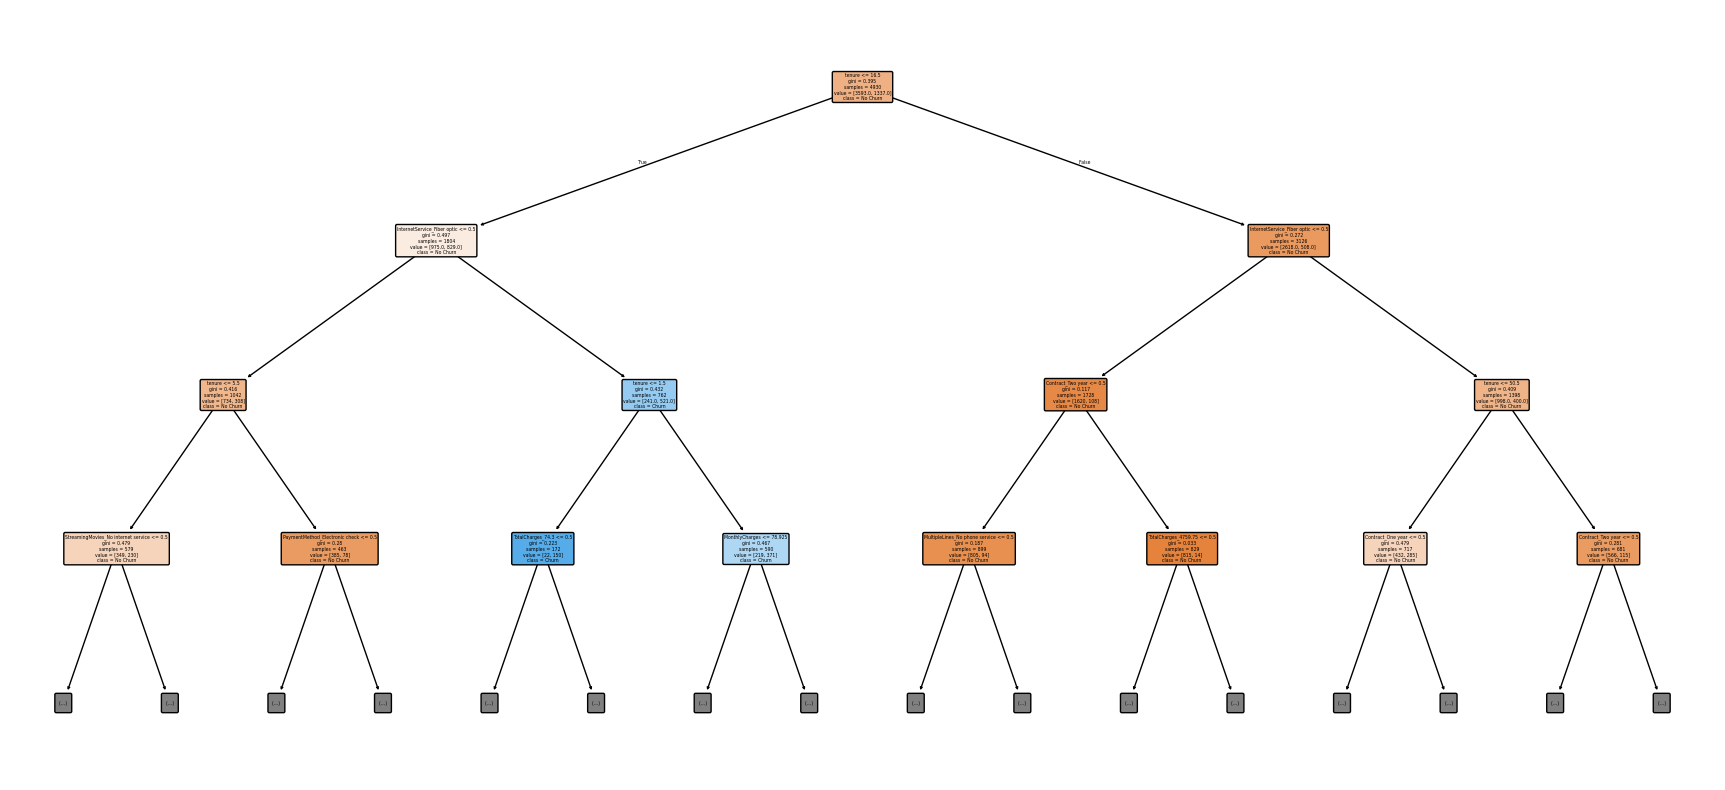

In [30]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(22, 10))
plot_tree(
    dt,
    feature_names=dt.feature_names_in_,
    class_names=["No Churn", "Churn"],
    filled=True,
    rounded=True,
    max_depth=3
)
plt.show()


Tuning the parameters

In [31]:
dt_tuned = DecisionTreeClassifier(
    random_state=2025,
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10
)

dt_tuned.fit(X_train, y_train)
y_pred2 = dt_tuned.predict(X_test)

print("Accuracy (tuned):", accuracy_score(y_test, y_pred2))
print("\nConfusion Matrix (tuned):\n", confusion_matrix(y_test, y_pred2))
print("\nClassification Report (tuned):\n", classification_report(y_test, y_pred2))


Accuracy (tuned): 0.7993374349266446

Confusion Matrix (tuned):
 [[1438  143]
 [ 281  251]]

Classification Report (tuned):
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1581
           1       0.64      0.47      0.54       532

    accuracy                           0.80      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.79      0.80      0.79      2113



Model 4: Random Forest Classifier

In this iteration, I will build a Random Forest model because one decision tree can be unstable, but a forest combines many trees to make predictions that are usually more reliable and less affected by noise, which can improve churn prediction.

Training a Random Forest Classifier Model

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,      # number of trees (can keep default too)
    random_state=2025
)

rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Prediction

In [33]:
# predicted class (0/1)
y_pred = rf.predict(X_test)

# predicted probability of class 1 (churn)
y_proba = rf.predict_proba(X_test)[:, 1]


Evaluation

In [34]:
## Confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[1432,  149],
       [ 254,  278]])

In [35]:
## Labelling confusion matrix components

TN, FP, FN, TP = cm.ravel()
TN, FP, FN, TP


(np.int64(1432), np.int64(149), np.int64(254), np.int64(278))

In [36]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy


np.float64(0.8092759110269758)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score

print("Random Forest Accuracy :", accuracy_score(y_test, y_pred))
print("Random Forest Precision:", precision_score(y_test, y_pred))
print("Random Forest Recall   :", recall_score(y_test, y_pred))
print("Random Forest F1-score :", f1_score(y_test, y_pred))
print("Random Forest ROC-AUC  :", roc_auc_score(y_test, y_proba))
print()
print(classification_report(y_test, y_pred))


Random Forest Accuracy : 0.8092759110269758
Random Forest Precision: 0.6510538641686182
Random Forest Recall   : 0.5225563909774437
Random Forest F1-score : 0.5797705943691345
Random Forest ROC-AUC  : 0.8370047509666005

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1581
           1       0.65      0.52      0.58       532

    accuracy                           0.81      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.80      0.81      0.80      2113



Plotting ROC curve plot

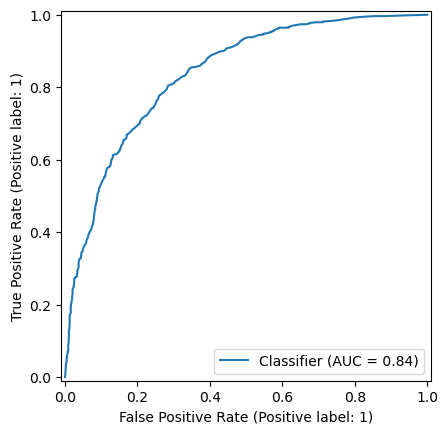

In [38]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.show()

Feature Importance (to be compared to other models)

In [39]:
import pandas as pd

df_rf_feat_impt = pd.DataFrame({
    "Feature": rf.feature_names_in_,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

df_rf_feat_impt["Cumulative Importance"] = df_rf_feat_impt["Importance"].cumsum()

df_rf_feat_impt.head(20)


,Feature,Importance,Cumulative Importance
1,tenure,0.116128,0.116128
2,MonthlyCharges,0.094272,0.210400
9,InternetService_Fiber optic,0.029052,0.239452
24,Contract_Two year,0.027759,0.267211
27,PaymentMethod_Electronic check,0.027320,0.294531
18,TechSupport_Yes,0.022919,0.317450
12,OnlineSecurity_Yes,0.022284,0.339733
23,Contract_One year,0.021706,0.361439
25,PaperlessBilling_Yes,0.020093,0.381532
3,gender_Male,0.018850,0.400383


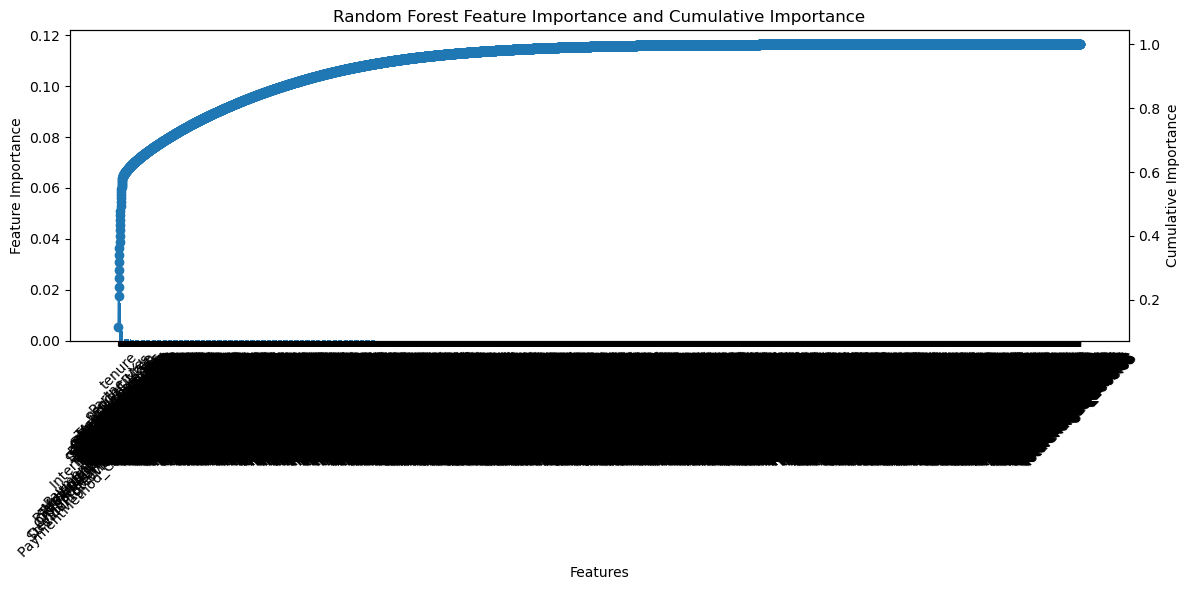

In [40]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(df_rf_feat_impt["Feature"], df_rf_feat_impt["Importance"])
ax1.set_xlabel("Features")
ax1.set_ylabel("Feature Importance")
ax1.tick_params(axis="x", rotation=45)

ax2 = ax1.twinx()
ax2.plot(df_rf_feat_impt["Feature"], df_rf_feat_impt["Cumulative Importance"], marker="o")
ax2.set_ylabel("Cumulative Importance")

plt.title("Random Forest Feature Importance and Cumulative Importance")
plt.tight_layout()
plt.show()


In [41]:
FILE_PATH = "TelcoCustomerChurn.csv" 

# Load unseen
df_unseen = pd.read_csv(FILE_PATH)

# Keep the same original feature columns (before OHE)
col_df_X = df.drop(col_y, axis=1).columns
X_unseen = pd.DataFrame(df_unseen, columns=col_df_X)

# Apply OHE
X_unseen = pd.get_dummies(X_unseen, drop_first=True)

# Reindex to match training OHE columns
col_ohe = X.columns.tolist()
X_unseen = X_unseen.reindex(columns=col_ohe, fill_value=0)

# Predict
pred_class = rf.predict(X_unseen)
pred_proba = rf.predict_proba(X_unseen)[:, 1]

X_unseen["Predicted_Churn"] = pred_class
X_unseen["Predicted_Churn_Prob"] = pred_proba

X_unseen.head()


,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Predicted_Churn,Predicted_Churn_Prob
0,0,1,29.85,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,0,0.205
1,0,34,56.95,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,0,0.025
2,0,2,53.85,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,1,0.750
3,0,45,42.30,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,0,0.010
4,0,2,70.70,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,1,0.910


In [42]:
if col_y in df_unseen.columns:
    y_unseen = df_unseen[col_y].map({"Yes": 1, "No": 0})
    X_unseen["Actual"] = y_unseen
    X_unseen[["Predicted_Churn", "Predicted_Churn_Prob", "Actual"]].head()


need to do Cumulative importance?

and why are we not doing plot tree here?

Model 5: Gradient Boosting

In this iteration, I will build a Gradient Boosting Classifier model because churn is often driven by subtle, interacting factors it improves results by building models step-by-step, where each new model focuses on the cases that were predicted wrongly earlier, so it can capture complex churn patterns more effectively than a single tree.

Training

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier(
    n_estimators=200,     # number of boosting stages (trees)
    learning_rate=0.05,   # smaller = slower but often generalises better
    max_depth=3,          # depth of individual trees (via base learners)
    random_state=2025
)

gbt.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.05
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


Prediction

In [44]:
# predicted class (0/1)
y_pred_gbt = gbt.predict(X_test)

# predicted probability of class 1 (churn)
y_proba_gbt = gbt.predict_proba(X_test)[:, 1]


Evaluation

In [45]:
from sklearn.metrics import confusion_matrix

cm_gbt = confusion_matrix(y_test, y_pred_gbt)
cm_gbt

array([[1429,  152],
       [ 254,  278]])

In [46]:
TN, FP, FN, TP = cm_gbt.ravel()
TN, FP, FN, TP


(np.int64(1429), np.int64(152), np.int64(254), np.int64(278))

In [47]:
accuracy_gbt = (TP + TN) / (TP + TN + FP + FN)
accuracy_gbt


np.float64(0.8078561287269286)

In [48]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, roc_auc_score
)

print("GBT Accuracy :", accuracy_score(y_test, y_pred_gbt))
print("GBT Precision:", precision_score(y_test, y_pred_gbt))
print("GBT Recall   :", recall_score(y_test, y_pred_gbt))
print("GBT F1-score :", f1_score(y_test, y_pred_gbt))
print("GBT ROC-AUC  :", roc_auc_score(y_test, y_proba_gbt))
print()
print(classification_report(y_test, y_pred_gbt))


GBT Accuracy : 0.8078561287269286
GBT Precision: 0.6465116279069767
GBT Recall   : 0.5225563909774437
GBT F1-score : 0.577962577962578
GBT ROC-AUC  : 0.8510882281605342

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1581
           1       0.65      0.52      0.58       532

    accuracy                           0.81      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.80      0.81      0.80      2113



need to do cumulative importance?

Why no need plot tree here?

Model 6: SVM

In this iteration, I will build an SVM model because it tries to draw the best boundary between churn and non-churn customers, and it can work well when there are many input features, especially after we scale the data.

Model 7: XGBoost

In this iteration, I will build an XGBoost model because it is a stronger and more advanced version of boosting that often performs very well on churn datasets, while also including controls to reduce overfitting.

1) Logistic Regression
2) LDA
3) DecisionTreeClassifier
4) RandomForestClassifier
5) GradientBoosting

What does each of these do / what insights does each give? And what are their limitations?
Should i use other models?

Metrics

Confusion Matrix \n
Accuracy \n 
Precision / Recall \n
should / can i use other metrics?

Take note: If churn rate is low, F1 / Recall / Pr-AUC become more important than accuracy

Iterative Model Development

1. Start with a baseline model (Logistic Regression)
2. Evaluate and diagnose what's weak; for example: accuracy looks okay but recall for churnes is low (lots of false negatives. Explain is this okay?)
3. Make one improvement at a time, then retrain and compare
4. Try other models when it makes sense (so need to explain why train other types of models)
5. Pick the best model based on goal / metric (not just accuracy)

can use mix of models? like for some models is useful for something, and others for other things

something like:

based on the previous iterations of the different models, it is evident that some models can be beneficial in various different metrics:

what else? (cannot be just yes/no). something like determining the probabilty rate to be the cut-off point to churn? what else?

OR must just use one model?

how to implement neural network in this assignment? and what are the metrics that I want to apply it to?

what are the components / features that i can use as much as possible in my streamlit?

where should i use feature importance and cumulative importance?


include plot trees

3D graphs using plotly?